izaaz Muhammad Razan
202331182

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv('sales.csv')

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Columns: 107 entries, Product_Code to Normalized 51
dtypes: float64(52), int64(54), object(1)
memory usage: 678.1+ KB
None


In [33]:
print(df.head())

  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalized 51  
0         

In [34]:
columns_to_cluster = [f'Normalized {i}' for i in range(52)]
data_to_cluster = df[columns_to_cluster]

In [35]:
print(data_to_cluster.isnull().sum())

Normalized 0     0
Normalized 1     0
Normalized 2     0
Normalized 3     0
Normalized 4     0
Normalized 5     0
Normalized 6     0
Normalized 7     0
Normalized 8     0
Normalized 9     0
Normalized 10    0
Normalized 11    0
Normalized 12    0
Normalized 13    0
Normalized 14    0
Normalized 15    0
Normalized 16    0
Normalized 17    0
Normalized 18    0
Normalized 19    0
Normalized 20    0
Normalized 21    0
Normalized 22    0
Normalized 23    0
Normalized 24    0
Normalized 25    0
Normalized 26    0
Normalized 27    0
Normalized 28    0
Normalized 29    0
Normalized 30    0
Normalized 31    0
Normalized 32    0
Normalized 33    0
Normalized 34    0
Normalized 35    0
Normalized 36    0
Normalized 37    0
Normalized 38    0
Normalized 39    0
Normalized 40    0
Normalized 41    0
Normalized 42    0
Normalized 43    0
Normalized 44    0
Normalized 45    0
Normalized 46    0
Normalized 47    0
Normalized 48    0
Normalized 49    0
Normalized 50    0
Normalized 51    0
dtype: int64

In [36]:
data_to_cluster = data_to_cluster.fillna(data_to_cluster.mean())

In [37]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_to_cluster)
    inertia.append(kmeans.inertia_)

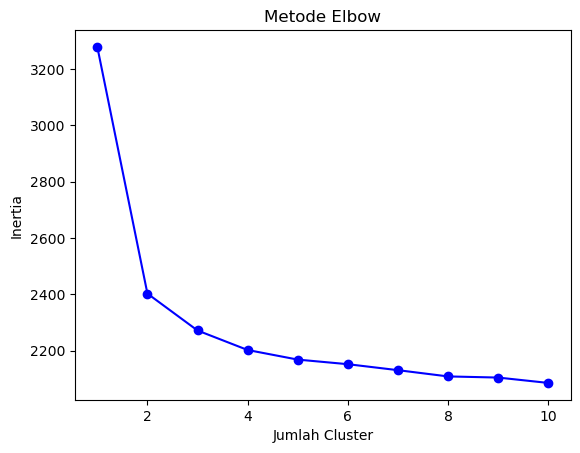

In [38]:
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.title('Metode Elbow')
plt.show()

In [39]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_to_cluster)

In [40]:
print(df[['Product_Code', 'Cluster']].head())

  Product_Code  Cluster
0           P1        2
1           P2        2
2           P3        2
3           P4        0
4           P5        0


In [41]:
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_to_cluster)

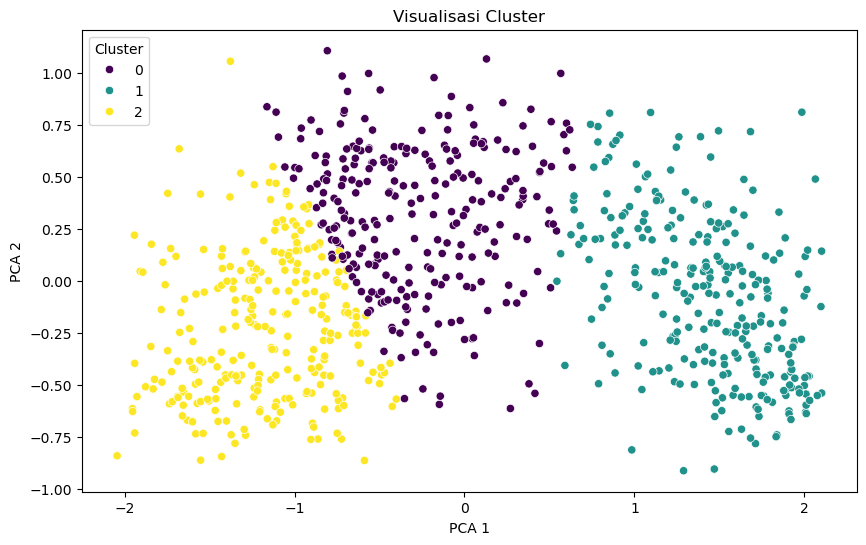

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_2d[:, 0], y=data_2d[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Visualisasi Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()